In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so
import os

In [9]:
server_rounds = pd.read_parquet('server_round_summary.parquet')
server_rounds.columns

Index(['round', 'roundtime', 'starttime', 'endtime', 'fittime', 'fitstart',
       'fitend', 'evaluatetime', 'evaluatestart', 'evaluateend', 'strategy',
       'epoch', 'exp_id'],
      dtype='object')

In [19]:
cols_to_keep = ['round','roundtime','fittime','evaluatetime', 'strategy', 'epoch']
server_rounds = server_rounds[cols_to_keep]
server_rounds
server_gb = server_rounds.groupby(['strategy','epoch','round']).agg(['mean','count','std'])
server_gb

roundtime                  fittime                  \
                              mean count       std     mean count       std   
strategy   epoch   round                                                      
fedadagrad epoch_1 1       36.8374     5  2.158070  24.6432     5  1.906276   
                   2       26.0446     5  0.761102  14.3184     5  0.731680   
                   3       25.6778     5  0.518481  14.3016     5  0.350429   
                   4       25.5912     5  0.664237  14.1446     5  0.501809   
                   5       25.5980     5  0.328910  14.0962     5  0.287294   
...                            ...   ...       ...      ...   ...       ...   
fedyogi    epoch_5 42      56.3015     4  0.674247  44.1340     4  0.729523   
                   43      56.0775     2  0.190212  43.6685     2  1.996162   
                   44      53.6760     2  0.578413  42.5400     2  1.002677   
                   45      55.7015     2  0.259508  43.9365     2  0.053033   
                   46      55.0000     1       NaN  43.9410     1       NaN   

                         evaluatetime                  
                                 mean count       std  
strategy   epoch   round                               
fedadagrad epoch_1 1           5.1556     5  0.271298  
                   2           5.1634     5  0.216141  
                   3           5.0886     5  0.138762  
                   4           5.0068     5  0.149550  
                   5           5.1094     5  0.211925  
...                               ...   ...       ...  
fedyogi    epoch_5 42          5.3015     4  0.175578  
                   43          4.9305     2  0.060104  
                   44          4.9785     2  0.481540  
                   45          4.8715     2  0.031820  
                   46          4.8120     1       NaN  

[1153 rows x 9 columns]

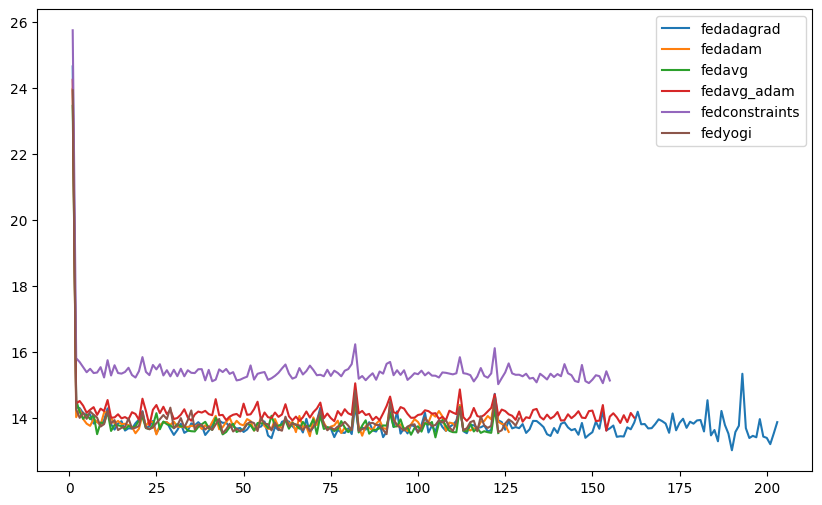

In [31]:
server_gb_flat = server_gb.reset_index()
plt.figure(figsize=(10,6))
epoch = server_gb_flat[server_gb_flat['epoch'] == 'epoch_1']
for strategy in epoch['strategy'].unique():
    df = epoch[epoch['strategy'] == strategy]
    plt.plot(df['round'], df['fittime']['mean'], label=strategy)
    #plt.errorbar(df['round'], df['roundtime']['mean'], yerr=df['roundtime']['std'], label=strategy)
plt.legend()
plt.show()